<a href="https://colab.research.google.com/github/vibhaannaswamy/INP_Git_Intro_forked/blob/master/python_tutorial_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Claybarn/INP_bootcamp_Python_Intro

Cloning into 'INP_bootcamp_Python_Intro'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 10), reused 12 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 1.24 MiB | 3.45 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
"""
Learning Objectives

This exercise was made with the following learning objectives:

(1) get students comfortable with the python environment
(2) understand how to use google while coding
(3) know the difference between accessing elements of variables and using functions
(4) understand for loops and if statements in python
(5) know how to make basic plots

In python, there are far fewer built in functions,
and the vast majority of functionality comes from external libraries.

We can import the external libraries like this:
"""
import numpy as np
import matplotlib.pyplot as plt

"""
As you might have noticed, we can rename a library upon importing it with the 'as' keyword. This
saves us from having to write out the full name of the library everytime we want to use it!
"""


"\nAs you might have noticed, we can rename a library upon importing it with the 'as' keyword. This\nsaves us from having to write out the full name of the library everytime we want to use it!\n"

In [3]:
# numpy files end in .npy and can easily be loaded:
cell_responses = np.load('/content/INP_bootcamp_Python_Intro/cell_responses.npy')
cell_times = np.load('/content/INP_bootcamp_Python_Intro/cell_times.npy')


In [4]:
############################ EXERCISES ############################

# Q1: what are the dimensions of the above data?
data_dim = cell_responses.shape # HINT: google what the "shape" function does for numpy objects
print(data_dim)
# Q3: what is the number stored in the 1203th row and 2nd column? Keep in mind in python we start with 0!
number = cell_responses[1202,1] # HINT: google how to do matrix indexing in numpy/python. Note the syntax is different than matlab!

(1920, 4)


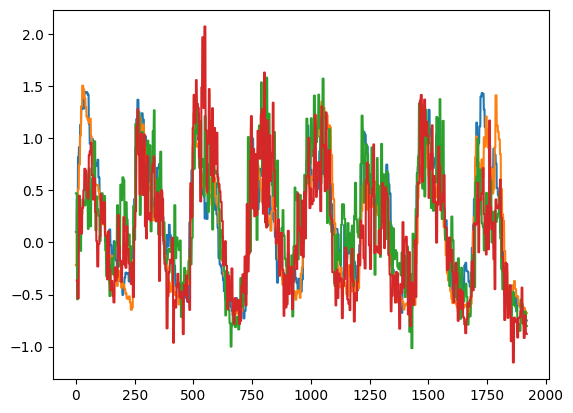

In [7]:
## plot the data from all the cells
plt.plot(cell_responses);

Text(0, 0.5, 'dFoF')

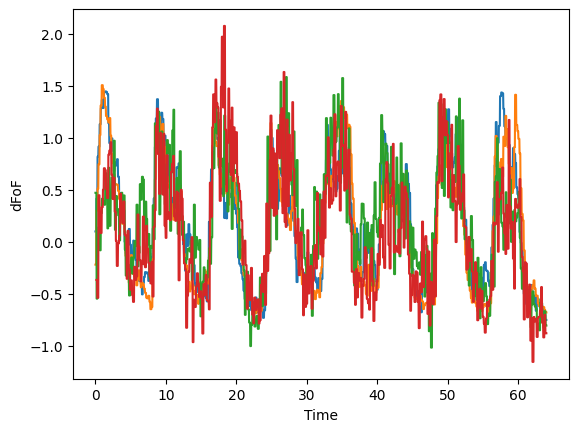

In [8]:
#create a time vector and plot
#create a time vector with: np.linspace(time start, time end, number of points);

fs = 30 # Hz
num_pts = cell_responses.shape[0] ## number of rows of cell_responses, which represents the number of points per cell
time = np.linspace(0,num_pts/fs,num_pts)

plt.plot(time, cell_responses)
plt.xlabel('Time')
plt.ylabel('dFoF')

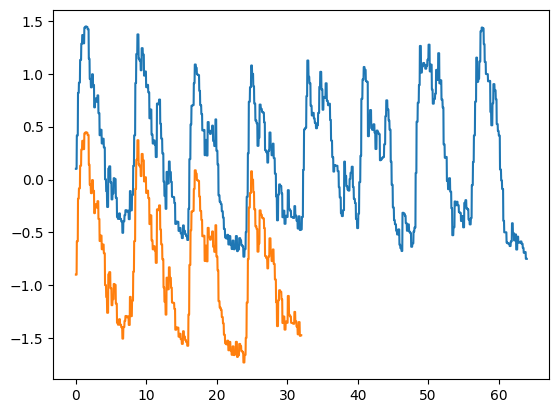

In [23]:
## plot the data from the first cell
first_cell_data = cell_responses[:, 0] ## all rows, first column (all responses of first cell)

# firstCellData is a 1920 x 1 vector (1920 time points, 1 neuron)
first_cell_data.shape
plt.plot(time, first_cell_data) ## plotting the blue line

## on the same plot, plot the first half of the data
# subtract 1 so we can see the two data sets
halfLen = int(first_cell_data.shape[0]/2) ## how long is half the responses
plt.plot(time[:halfLen],first_cell_data[:halfLen]-1) ## plotting the orange line


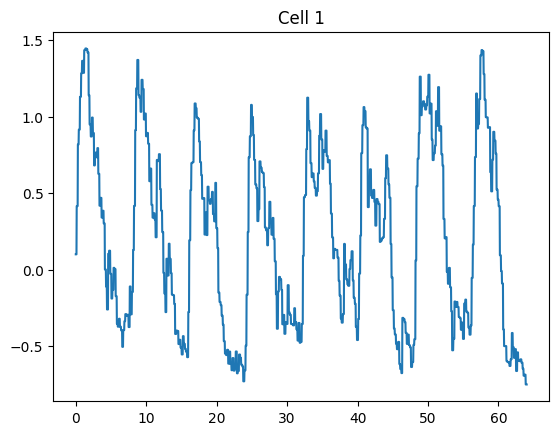

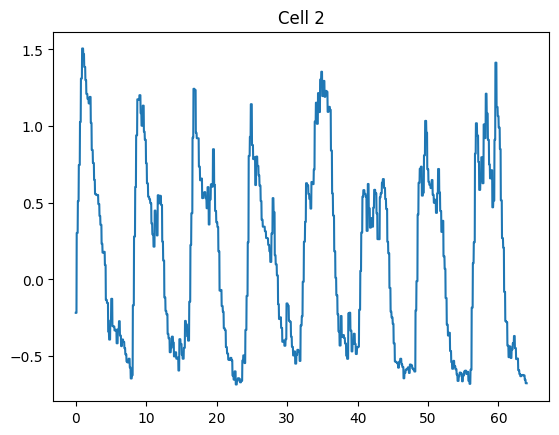

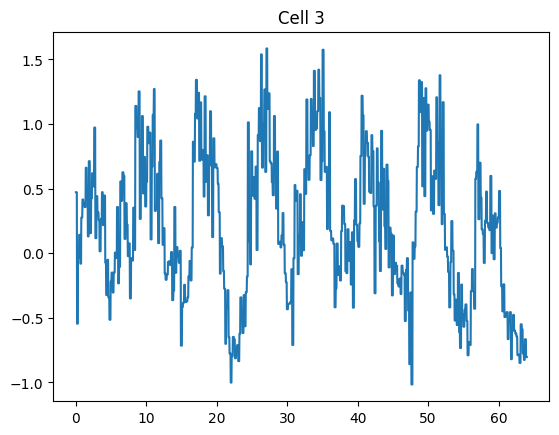

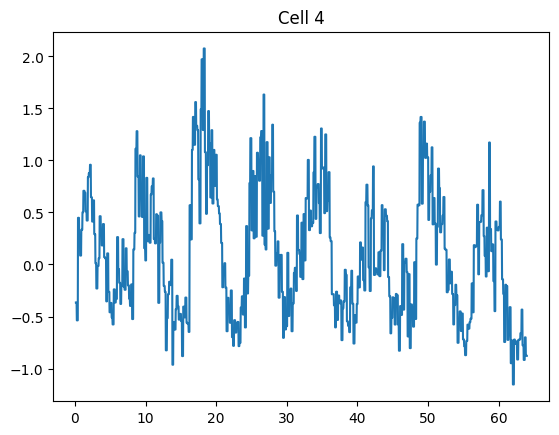

In [11]:
## introducing the for loop: ploting each cell individually
for i in range(cell_responses.shape[1]): ## .shape[1] represents columns, which are cells
   plt.figure()
   plt.plot(time, cell_responses[:, i])
   plt.title('Cell ' + str(i+1))

In [28]:
## we want to take the average of activity for each cell
# see numpy mean function

cell_mean = np.nanmean(cell_responses, axis=0)
print('Average per Cell: ', cell_mean)

## call a numpy function on the data
data_mean = np.nanmean(cell_responses) ## ignores nan values
print('Average of Data:', data_mean)

Average per Cell:  [0.21043405 0.14382898 0.20998655 0.1011271 ]
Average of Data: 0.16637815389455407


(1920,)


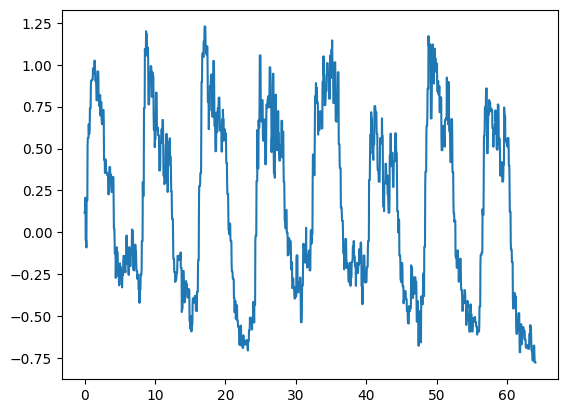

In [29]:
# This mean gives 1 value, must be the mean of all the data
# But what if we want the mean trace (mean of 4 cells over all 1920 values)?

data_mean = np.nanmean(cell_responses, axis=1) ## representing columns (each cell)
print(data_mean.shape)
plt.plot(time,data_mean);


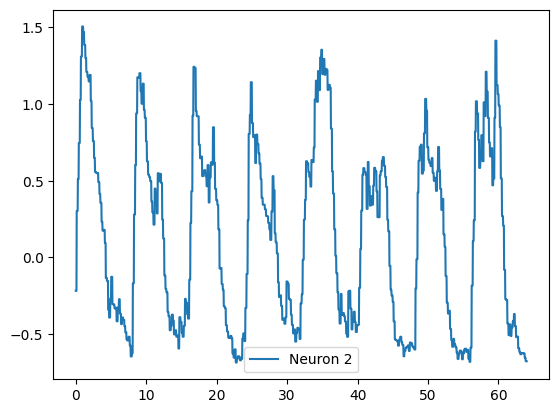

In [30]:
## What if we want to plot both the activity and the histogram showing the distribution of activity?  We can make our own plotting function

neuron_num = 1;   # cell we want to plot

# store names for a legend in a "cell array"
legendLabelsFull = ['Neuron 1','Neuron 2','Neuron 3','Neuron 4']

plt.plot(time, cell_responses[:,neuron_num], label=legendLabelsFull[neuron_num])
plt.legend();


In [ ]:
## Exercises

# 1) create a loop to plot all 4 cells using your plotData function
# 2) change the color of the plots
# 3) instead of a loop, plot all 4 cells in subplots
# 4) what is the minimum activity in cell 1?
# 5) what is the maximum activity of all cells?
# 6) find number of points above 1 for each cell

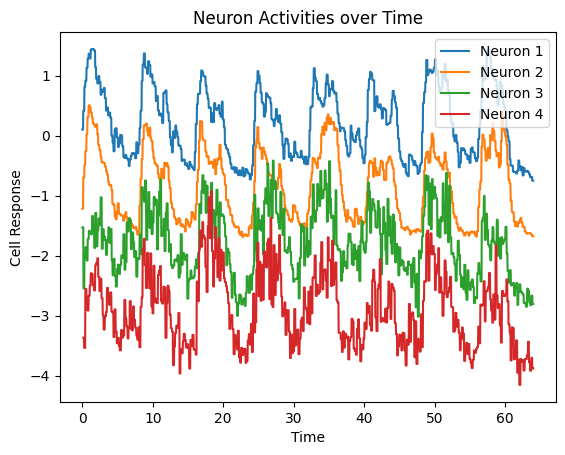

In [52]:
# 1) create a loop to plot all 4 cells using your plotData function

plt.figure()
legendLabelsFull = ['Neuron 1','Neuron 2','Neuron 3','Neuron 4']
for cell in range(cell_responses.shape[1]):
  plt.plot(time, cell_responses[:, cell]-cell, label=legendLabelsFull[cell])
plt.legend()
plt.title('Neuron Activities over Time')
plt.xlabel('Time')
plt.ylabel('Cell Response');

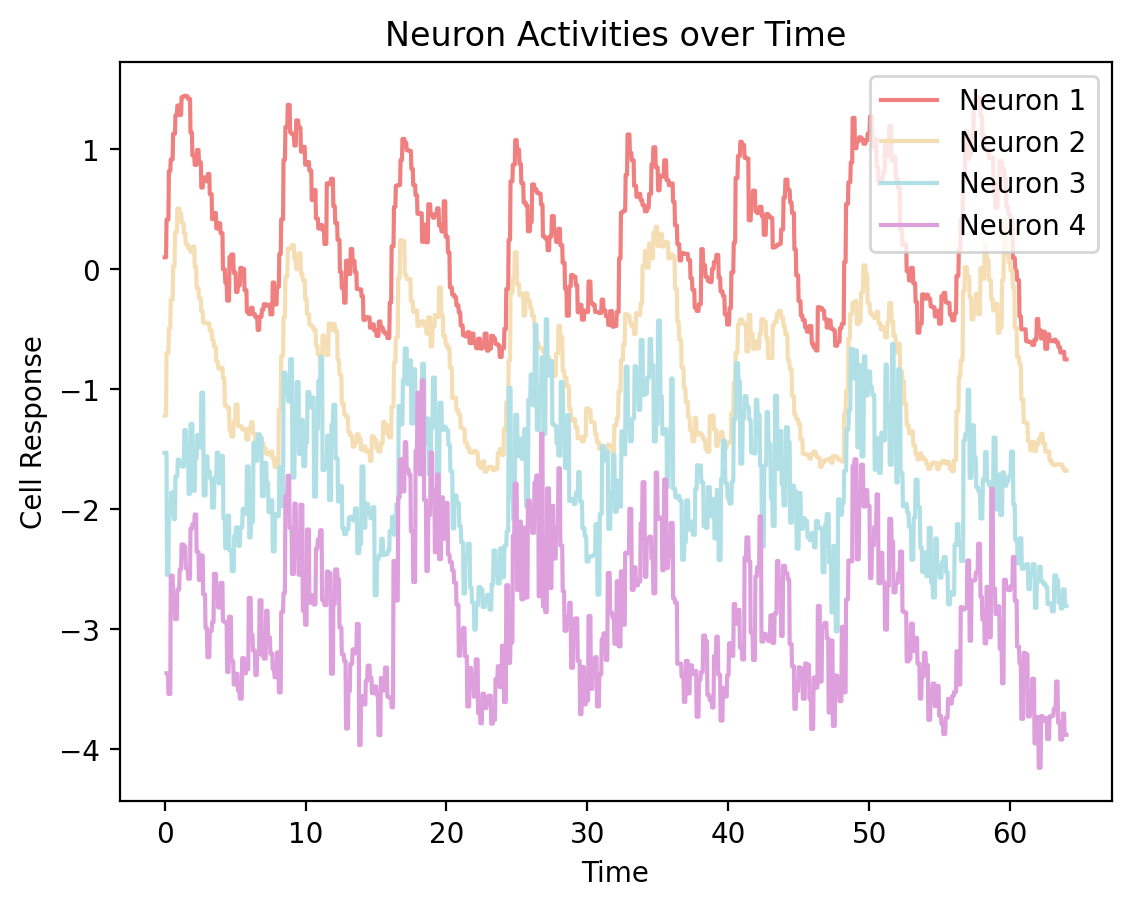

In [72]:
# 2) change the color of the plots

plt.figure()
colors = ['lightcoral', 'wheat', 'powderblue', 'plum']
legendLabelsFull = ['Neuron 1','Neuron 2','Neuron 3','Neuron 4']
for cell in range(cell_responses.shape[1]):
  plt.plot(time, cell_responses[:, cell]-cell, label=legendLabelsFull[cell], color=colors[cell])
plt.legend()
plt.title('Neuron Activities over Time')
plt.xlabel('Time')
plt.ylabel('Cell Response');

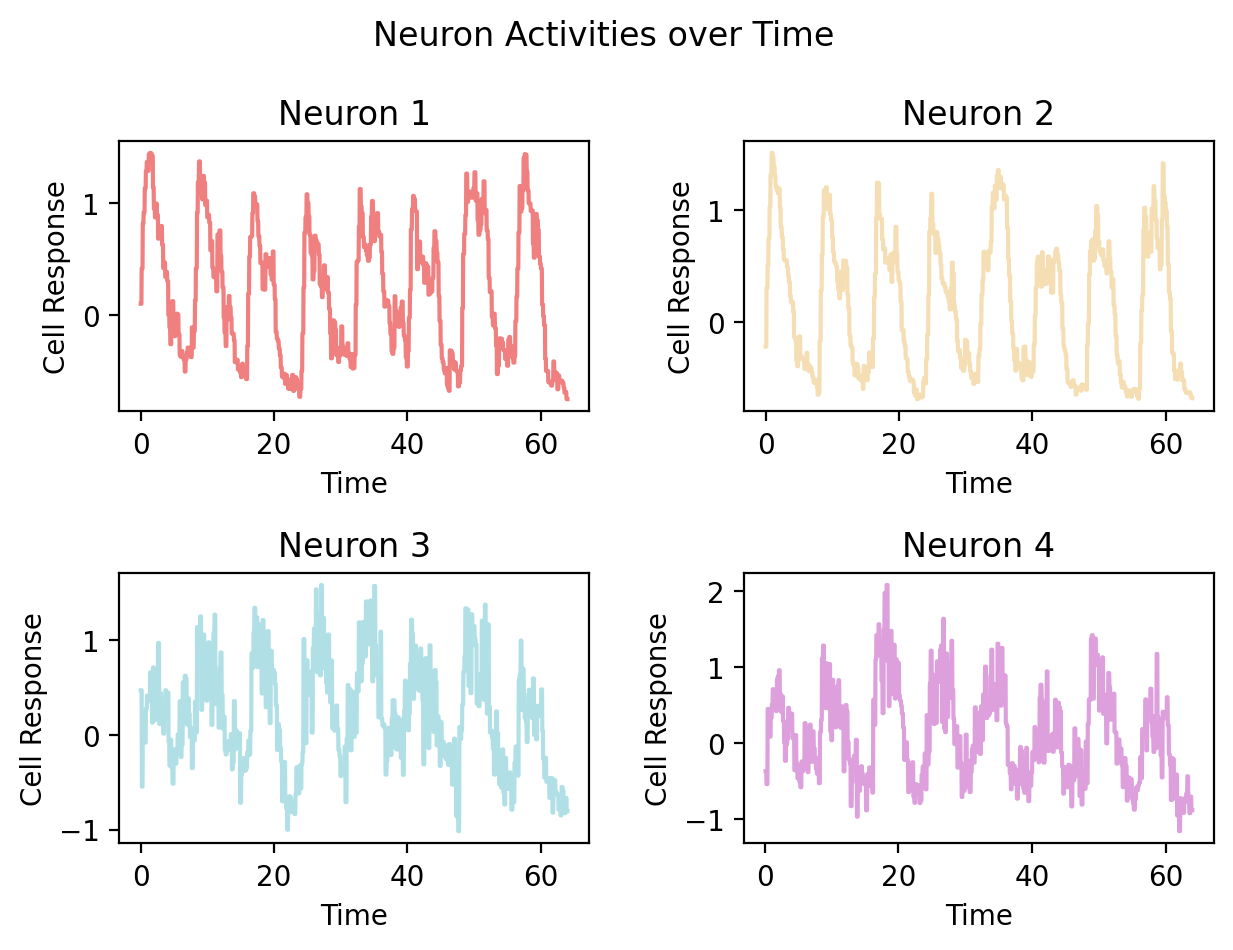

In [84]:
# 3) instead of a loop, plot all 4 cells in subplots

%config InlineBackend.figure_format = 'retina'

plt.figure()
plt.suptitle('Neuron Activities over Time')

plt.subplot(2, 2, 1)
plt.plot(time, cell_responses[:, 0], color='lightcoral')
plt.title('Neuron 1')
plt.xlabel('Time')
plt.ylabel('Cell Response')

plt.subplot(2, 2, 2)
plt.plot(time, cell_responses[:, 1], color='wheat')
plt.title('Neuron 2')
plt.xlabel('Time')
plt.ylabel('Cell Response')

plt.subplot(2, 2, 3)
plt.plot(time, cell_responses[:, 2], color='powderblue')
plt.title('Neuron 3')
plt.xlabel('Time')
plt.ylabel('Cell Response')

plt.subplot(2, 2, 4)
plt.plot(time, cell_responses[:, 3], color='plum')
plt.title('Neuron 4')
plt.xlabel('Time')
plt.ylabel('Cell Response')

plt.tight_layout()

In [94]:
# 4) what is the minimum activity in cell 1?

min_cell_1 = np.nanmin(cell_responses[:, 0])
print(min_cell_1)

-0.7498701233144245


In [93]:
# 5) what is the maximum activity of all cells?

max_cells_all = np.nanmax(cell_responses)
print(max_cells_all)

2.0758543766092457


In [95]:
# 6) find number of points above 1 for each cell

for cell in range(cell_responses.shape[1]):
  above_1 = cell_responses[:, cell] > 1
  print(f'Neuron {cell} has {sum(above_1)} points above 1')

Neuron 0 has 204 points above 1
Neuron 1 has 199 points above 1
Neuron 2 has 192 points above 1
Neuron 3 has 185 points above 1
